In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import pairs2groups # pip install pairs2groups
import fly_plot_lib.plot as fpl # python -m pip install 'fly_plot_lib @ git+https://https://github.com/florisvb/FlyPlotLib
import figurefirst as fifi # pip install figurefirst

# Make some fake data

In [31]:
D1 = np.random.normal(1, 2, 10)
D2 = np.random.normal(5, 2, 15)
D3 = np.random.normal(1.2, 3, 12)
D4 = np.random.normal(3, 5, 20)

data = {'wildtype': D1,
         'cross A': D2,
         'cross B': D3,
         'cross C': D4}

# Identify statistically signficant groups

Uses two-tailed Mann-Whitney U-test at p<0.05 and Bonferroni corrections. 

In [38]:
group_info = pairs2groups.label_homogeneous_groups([data[k] for k in data.keys()], significance_level=0.05)
group_strings = group_info['group_strings']

for key, val in group_info.items():
    print(key)
    print(val)
    print('')

group_strings
['a', 'b', 'a', 'ab']

p_values
[[           nan 1.55815600e-04 4.88717873e-01 4.47830740e-01]
 [1.55815600e-04            nan 2.25352937e-04 7.45320584e-02]
 [4.88717873e-01 2.25352937e-04            nan 3.01200607e-01]
 [4.47830740e-01 7.45320584e-02 3.01200607e-01            nan]]

groups
[(1, 3), (0, 2, 3)]

medians
[0.7805567689572077, 6.093676268624049, 0.08038735333458724, 2.7742197587187576]



# Plot the data as scatter boxes

For this plotting style, the scatter will show the real distribution of the data. The horizontal bar shows the mean (or median if you choose), and the shading shows the 95% confidence interval of the mean (or median). The advantage here is that the shading makes it easy to do your own rough statistical comparison: when shadings do not overlap, the different in means (or medians) is statistically significant. 

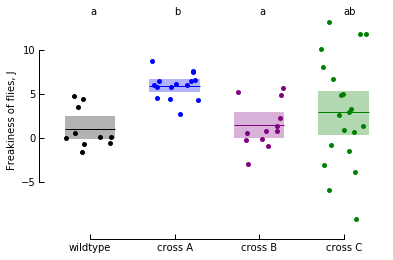

In [39]:
fig = plt.figure(111)
ax = fig.add_subplot(111)

plotting_order = ['wildtype', 'cross A', 'cross B', 'cross C']

colors = {'wildtype': 'black',
          'cross A': 'blue',
          'cross B': 'purple',
          'cross C': 'green'}

xticks = []
for i, label in enumerate(plotting_order):
    fpl.scatter_box(ax, i, data[label], color=colors[label], use='mean')
    xticks.append(i)
    
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], xticks=xticks, yticks=[-5, 0, 5, 10])
ax.set_xticklabels(plotting_order)
ax.set_ylabel('Freakiness of flies, J')

ylevel = 14
for i, label in enumerate(plotting_order):
    ax.text(i, ylevel, group_strings[i])

##### Caption info: Letters above data indicate statistically significant groups (two-tailed Mann–Whitney U-test at P < 0.05 with four-way Bonferroni corrections). In all panels, shading indicates the bootstrapped 95% confidence interval around the mean.